In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('winning_booths_data.csv')
features_to_remove = ['featured_category_id', 'value_em', 'created_at','first_sale', 'profit_per_day', 'd_per_order','source_em','city','state','country','conversion_rate','membership_level']
df.drop(features_to_remove, axis=1, inplace=True)
df.dtypes

id                   int64
profit_estimate    float64
days_to_sale       float64
days_as_user       float64
orders             float64
items_for_sale     float64
view_count         float64
offers             float64
feedback           float64
rate               float64
rating             float64
dtype: object

In [2]:
def min_max_norm(values):
    normalized = []
    minimum = min(values)
    maximum = max(values)
    for value in values:
        normalized.append((value-minimum)/(maximum-minimum))
    return normalized

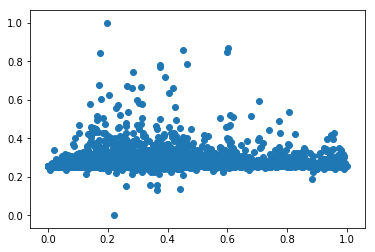

In [5]:
df['profit_norm'] = min_max_norm(df.profit_estimate)
df['days_as_user_norm'] = min_max_norm(df.days_as_user)
plt.scatter(df.days_as_user_norm,df.profit_norm)
plt.show()

In [11]:
def z_score_norm(values):
    normalized = []
    mean_values = values.mean()
    std_values = values.std()
    for value in values:
        normalized.append((value-mean_values)/std_values)
    return normalized

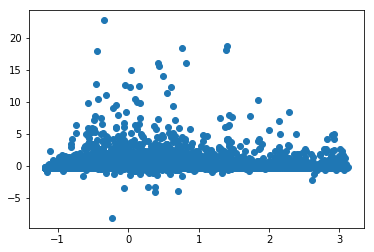

In [12]:
df['profit_norm'] = z_score_norm(df.profit_estimate)
df['days_as_user_norm'] = z_score_norm(df.days_as_user)
plt.scatter(df.days_as_user_norm,df.profit_norm)
plt.show()

In [6]:
df.corr()


,id,profit_estimate,days_to_sale,days_as_user,orders,items_for_sale,view_count,offers,feedback,rate,rating,profit_norm,days_as_user_norm
id,1.000000,-0.150625,-0.278381,-0.947805,-0.197927,-0.010833,-0.003441,0.058311,-0.169756,-0.182464,-0.467336,-0.150625,-0.947805
profit_estimate,-0.150625,1.000000,-0.019282,0.125773,0.702488,0.054815,0.156591,0.305734,0.514943,0.026453,0.122084,1.000000,0.125773
days_to_sale,-0.278381,-0.019282,1.000000,0.317795,-0.027668,0.003237,-0.003918,-0.018162,-0.016315,0.049998,0.047358,-0.019282,0.317795
days_as_user,-0.947805,0.125773,0.317795,1.000000,0.188010,0.010406,0.013222,-0.053452,0.186381,0.218123,0.397394,0.125773,1.000000
orders,-0.197927,0.702488,-0.027668,0.188010,1.000000,0.053105,0.192614,0.474025,0.765510,0.027853,0.141657,0.702488,0.188010
items_for_sale,-0.010833,0.054815,0.003237,0.010406,0.053105,1.000000,0.341485,0.034505,0.008896,-0.039202,0.005030,0.054815,0.010406
view_count,-0.003441,0.156591,-0.003918,0.013222,0.192614,0.341485,1.000000,0.328429,0.093598,-0.023965,0.038759,0.156591,0.013222
offers,0.058311,0.305734,-0.018162,-0.053452,0.474025,0.034505,0.328429,1.000000,0.259514,-0.030894,0.046831,0.305734,-0.053452
feedback,-0.169756,0.514943,-0.016315,0.186381,0.765510,0.008896,0.093598,0.259514,1.000000,0.245228,0.104826,0.514943,0.186381
rate,-0.182464,0.026453,0.049998,0.218123,0.027853,-0.039202,-0.023965,-0.030894,0.245228,1.000000,0.306876,0.026453,0.218123


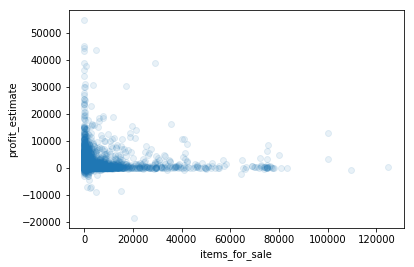

In [24]:
plt.scatter(df.items_for_sale,df.profit_estimate,alpha=0.1)
plt.xlabel('items_for_sale')
plt.ylabel('profit_estimate')
plt.show()
